# 3.2 Simulating individual trajectories

In this tutorial, you will learn how to plot the trajectories of individual agents.

## Problem

Taking our SimpleABM, how can we modify it to plot each agent's trajectory through the S, I, and R states? See "EXERCISE" comments below for places where the code needs to be modified.

In [ ]:
"""
Original code
"""

import numpy as np
import pylab as pl

# Set parameters
beta = 2.5 # Infection rate
gamma = 1.0 # Recovery rate
contact_rate = 0.5 # Fraction of population each person is connected to
I0 = 5 # Number of people initially infected
N = 100 # Total population size
maxtime = 10 # How long to simulate for
npts = 100 # Number of time points during the simulation
dt = maxtime/npts # Timestep length


class Person:
    """ Define each agent in the model """

    def __init__(self):
        self.S = True # People start off susceptible
        self.I = False
        self.R = False

    def infect(self):
        self.S = False
        self.I = True

    def recover(self):
        self.I = False
        self.R = True

    def check_infection(self, other):
        if self.S: # A person must be susceptible to be infected
            if other.I: # The other person must be infectious
                if np.random.rand() < beta/(N*contact_rate)*dt: # Infection is probabilistic
                    self.infect()

    def check_recovery(self):
        if self.I: # A person must be infected to recover
            if np.random.rand() < gamma*dt: # Recovery is also probabilistic
                self.recover()


class Sim:
    """ Define the simulation """
    
    def __init__(self):
        # Create the arrays -- one entry per timestep
        self.x = np.arange(npts)
        self.S = np.zeros(npts)
        self.I = np.zeros(npts)
        self.R = np.zeros(npts)
        self.time = self.x*dt # Create the time vector
        self.S[0] = N - I0 # Set initial conditions
        self.I[0] = I0

        # EXERCISE: initialize state here
        
        self.people = [Person() for i in range(N)] # Create all the people
        for person in self.people[0:I0]: # Make the first I0 people infectious
            person.infect() # Set the initial conditions

    def count(self):
        S = sum([person.S for person in self.people])
        I = sum([person.I for person in self.people])
        R = sum([person.R for person in self.people])
        return S, I, R

    # EXERCISE: write a "check_state" function

    def check_infections(self):
        for person1 in self.people:
            contacts = np.random.randint(0, N, int(N*contact_rate))
            for contact in contacts:
                person2 = self.people[contact]
                person1.check_infection(person2)

    def check_recoveries(self):
        for person in self.people:
            person.check_recovery()
    
    def run(self):
        for t in self.x[:-1]:
            # Update the agents
            self.check_infections() # Check which infectious occur
            self.check_recoveries() # Check which recoveries occur
            
            # Collect results
            S, I, R = self.count()
            self.S[t+1] = S
            self.I[t+1] = I
            self.R[t+1] = R

            # EXERCISE: store state here
            
        print('Run finished')
    
    def plot(self):
        pl.plot(self.time, self.S, label='Susceptible')
        pl.plot(self.time, self.I, label='Infectious')
        pl.plot(self.time, self.R, label='Recovered')
        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Number of people')

        # EXERCISE: plot state here
        
        pl.show()


if __name__ == '__main__':
    sim = Sim()
    sim.run()
    sim.plot()

## Solution

Run finished


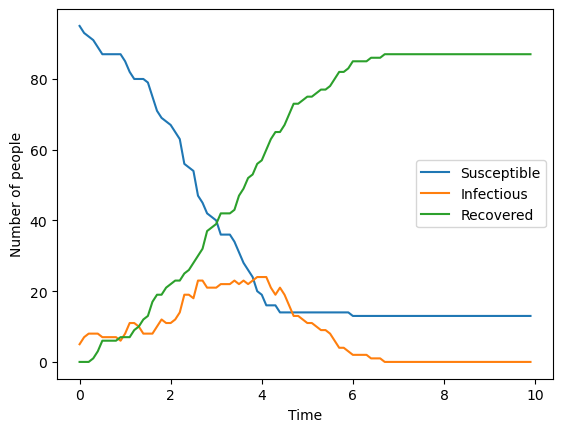

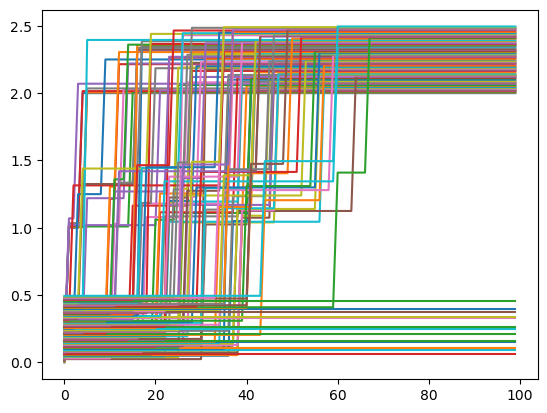

In [1]:
"""
Solution code
"""

import numpy as np
import pylab as pl

# Set parameters
beta = 2.5 # Infection rate
gamma = 1.0 # Recovery rate
contact_rate = 0.5 # Fraction of population each person is connected to
I0 = 5 # Number of people initially infected
N = 100 # Total population size
maxtime = 10 # How long to simulate for
npts = 100 # Number of time points during the simulation
dt = maxtime/npts # Timestep length


class Person:
    """ Define each agent in the model """

    def __init__(self):
        self.S = True # People start off susceptible
        self.I = False
        self.R = False

    def infect(self):
        self.S = False
        self.I = True

    def recover(self):
        self.I = False
        self.R = True

    def check_infection(self, other):
        if self.S: # A person must be susceptible to be infected
            if other.I: # The other person must be infectious
                if np.random.rand() < beta/(N*contact_rate)*dt: # Infection is probabilistic
                    self.infect()

    def check_recovery(self):
        if self.I: # A person must be infected to recover
            if np.random.rand() < gamma*dt: # Recovery is also probabilistic
                self.recover()


class Sim:
    """ Define the simulation """
    
    def __init__(self):
        # Create the arrays -- one entry per timestep
        self.x = np.arange(npts)
        self.S = np.zeros(npts)
        self.I = np.zeros(npts)
        self.R = np.zeros(npts)
        self.time = self.x*dt # Create the time vector
        self.S[0] = N - I0 # Set initial conditions
        self.I[0] = I0

        # EXERCISE: initialize state here
        self.states = np.zeros((npts, N))
        
        self.people = [Person() for i in range(N)] # Create all the people
        for person in self.people[0:I0]: # Make the first I0 people infectious
            person.infect() # Set the initial conditions

    def count(self):
        S = sum([person.S for person in self.people])
        I = sum([person.I for person in self.people])
        R = sum([person.R for person in self.people])
        return S, I, R
    
    # EXERCISE: write a "check_state" function
    def check_states(self):
        out = []
        for person in self.people:
            if person.S:
                state = 0
            elif person.I:
                state = 1
            elif person.R:
                state = 2
            out.append(state)
        return out

    def check_infections(self):
        for person1 in self.people:
            contacts = np.random.randint(0, N, int(N*contact_rate))
            for contact in contacts:
                person2 = self.people[contact]
                person1.check_infection(person2)

    def check_recoveries(self):
        for person in self.people:
            person.check_recovery()
    
    def run(self):
        for t in self.x[:-1]:
            # Update the agents
            self.check_infections() # Check which infectious occur
            self.check_recoveries() # Check which recoveries occur
            
            # Collect results
            S, I, R = self.count()
            self.S[t+1] = S
            self.I[t+1] = I
            self.R[t+1] = R

            # EXERCISE: store state here
            self.states[t+1, :] = self.check_states()
            
        print('Run finished')
    
    def plot(self):
        pl.figure()
        pl.plot(self.time, self.S, label='Susceptible')
        pl.plot(self.time, self.I, label='Infectious')
        pl.plot(self.time, self.R, label='Recovered')
        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Number of people')

        # EXERCISE: plot state here
        pl.figure()
        for p in range(N):
            pl.plot(self.states[:,p]+p*0.005)
        
        pl.show()


if __name__ == '__main__':
    sim = Sim()
    sim.run()
    sim.plot()